In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame

#generate 2d classification dataset
X, y = make_blobs(n_samples=200, centers=3, n_features=2) #나눌만한 집단을 랜덤하게 만들어준다
# ㄴ 여기서 이미 그룹으로 만들어진 것

#scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0: 'red', 1:'blue', 2:'green'}
fig , ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped :
    group.plot(ax=ax, kind='scatter', x = 'x', y= 'y', label=key, color=colors[key])
    

plt.show()
df

<Figure size 640x480 with 1 Axes>

,x,y,label
0,4.607017,0.890966,1
1,2.969896,-5.518216,2
2,3.501078,-6.169702,2
3,4.838752,-1.032734,1
4,5.600966,0.816147,1
...,...,...,...
195,5.922454,0.118700,1
196,4.339538,0.086669,1
197,4.850763,0.649195,1
198,3.433566,-3.801764,2


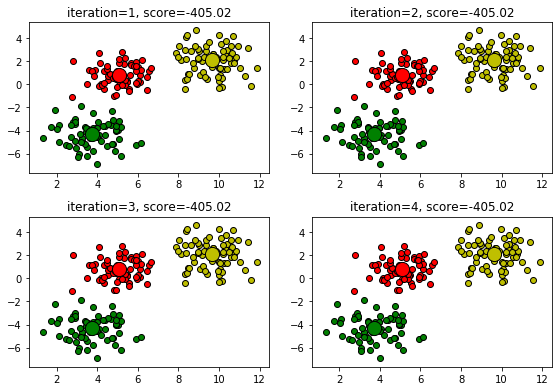

In [2]:
from sklearn.cluster import KMeans
def plot_KMeans(n): # n은 iteration 횟수이다
    model = KMeans(n_clusters=3, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='o', facecolor='y', edgecolors='k')
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], marker='o', facecolor='g', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='o', c='r', edgecolors='k', s=200)
    plt.scatter(c1[0], c1[1], marker='o', c='y', edgecolors='k', s=200)
    plt.scatter(c2[0], c2[1], marker='o', c='g', edgecolors='k', s=200)
    plt.grid(False)
    plt.title(f"iteration={n}, score={model.score(X):5.2f}")
    
plt.figure(figsize=(8,8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()


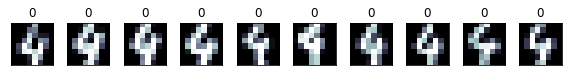

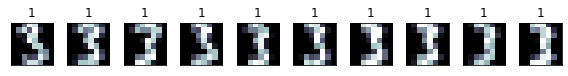

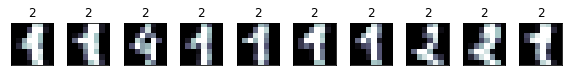

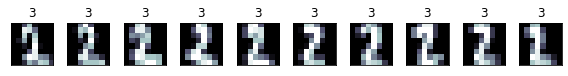

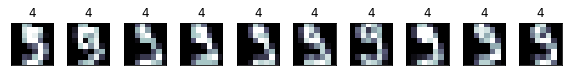

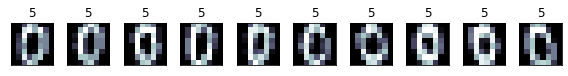

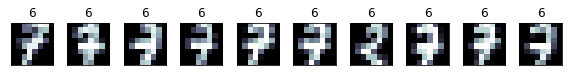

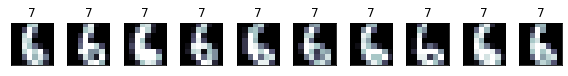

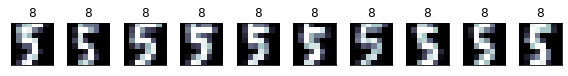

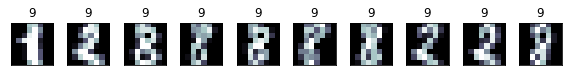

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters = 10, random_state = 0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while(i < 10 and i < images.shape[0]) :
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap = plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number) :
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [4]:
import numpy as np
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor = .5, noise = .09)
X2, y2 = make_moons(n_samples= n_samples, noise = .1)

def plot_DBSCAN(title, X, eps, xlim ,ylim) :
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = np.logical_not((model.labels_ == 0) | (model.labels_ == 1))
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s= 5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s= 5)
    X_core = X[model.core_sample_indices_, :] # 코어들은 어디에 있는가? -> 굵게 표기된 것들이 core이다
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim) # asterisk의 의미: positional argument => 매개변수의 순서대로 전달되는 인자를 의미한다.
    plt.ylim(*ylim) 
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

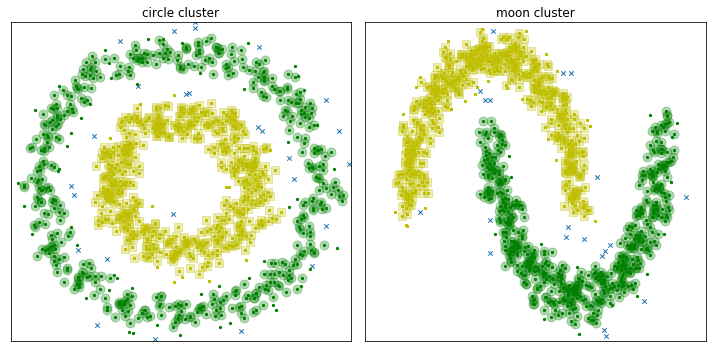

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("circle cluster", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("moon cluster", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

# outlier는 x 로 나타난다.
# 각 색은 group 0과 group 1을 나타낸다
# 굵게 표기된 것들은 core 이다
# k-mean이었다면, 가까운 것끼리 원형으로 묶어보려고 노력했을 것이다 ->  잘 동작하지 않음


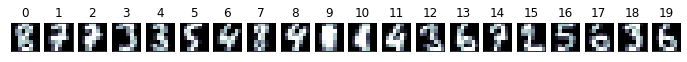

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()
n_image = 20
np.random.seed(0)
idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]

plt.figure(figsize=(12, 1))

for i in range(n_image) :
    plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i], cmap = plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z

# 첫 번째 두 열: 계층 구조를 나타낸다.

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

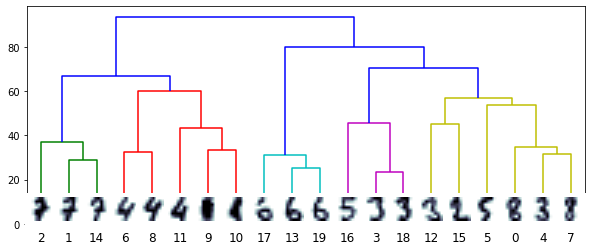

In [8]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10,4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], cmap = plt.cm.bone_r, interpolation="bilinear", zoom=3)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0), box_alignment=(0.5, -0.1), bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)
    
plt.show()


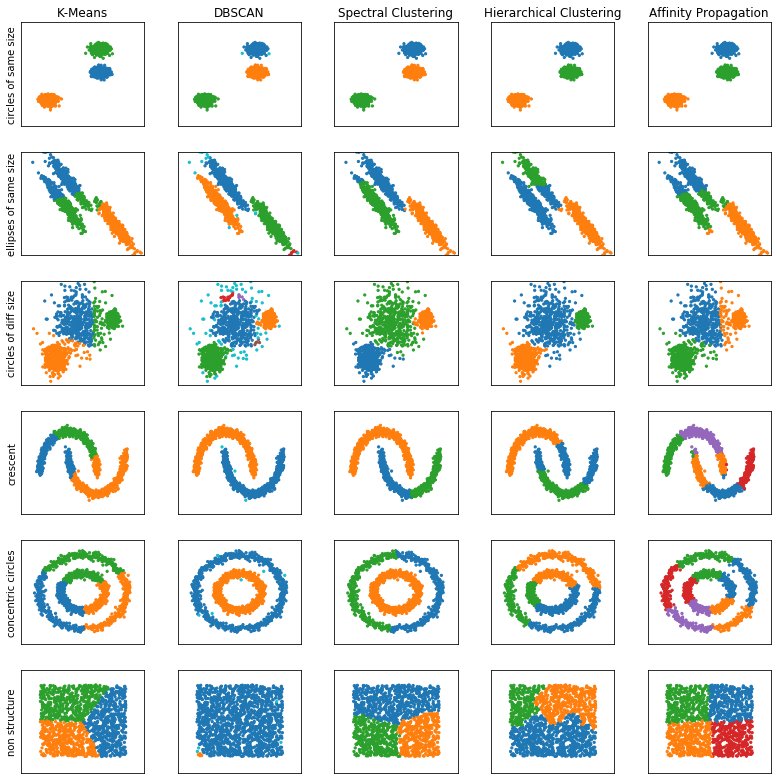

In [28]:
from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.utils.testing import ignore_warnings

np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples= n_samples, random_state = 8)
X, y = make_blobs(n_samples = n_samples, random_state = 170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples = n_samples, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
noisy_circles = make_circles(n_samples = n_samples, factor = .5, noise = .05)
noisy_moons = make_moons(n_samples = n_samples, noise = .05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "circles of same size" : blobs,
    "ellipses of same size" : anisotropic,
    "circles of diff size" : varied,
    "crescent" : noisy_moons,
    "concentric circles" : noisy_circles,
    "non structure": no_structure
}


plt.figure(figsize=(11, 11))
plot_num = 1
for i , (data_name, (X, y)) in enumerate(datasets.items()) :
    X = StandardScaler().fit_transform(X)
    
    two_means = MiniBatchKMeans(n_clusters = 3)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters = 3, affinity = "nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=3)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Spectral Clustering', spectral),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation)
    )
    
    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else :
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s = 5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
        
plt.tight_layout()
plt.show()

In [31]:
groundtruth = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0 ,0],
    [1, 1, 1, 0 ,0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1]
])

clustering = np.array([
    [1, 1, 0 ,0, 0],
    [1, 1, 0 ,0 ,0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0 ,0, 1, 1, 1]
])

incidence_mask = (groundtruth == clustering)
print(incidence_mask)
incidence = 1 * (incidence_mask)
print(incidence)

inc_sum = np.sum(incidence)
inc_shape = incidence.shape
inc_prod = np.prod(inc_shape)
print(inc_sum)
print(inc_shape)
print(inc_prod)
rand_index = inc_sum / inc_prod
rand_index

[[ True  True False  True  True]
 [ True  True False  True  True]
 [False False  True False False]
 [ True  True False  True  True]
 [ True  True False  True  True]]
[[1 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [1 1 0 1 1]
 [1 1 0 1 1]]
17
(5, 5)
25


0.68

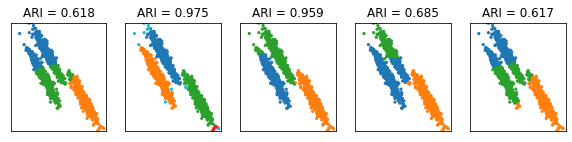

In [33]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y_true = anisotropic

plt.figure(figsize=(12, 2))
plot_num = 1
X = StandardScaler().fit_transform(X)
for name, algorithm in clustering_algorithms:
    with ignore_warnings(category=UserWarning):
        algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    title = "ARI = {:5.3f}".format(adjusted_rand_score(y_true, y_pred))
    plt.subplot(1, len(datasets), plot_num)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], s = 5, color=colors[y_pred])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1

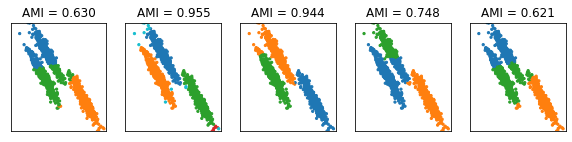

In [35]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

X, y_true = anisotropic

plt.figure(figsize=(12, 2))
plot_num = 1
X = StandardScaler().fit_transform(X)
for name, algorithm in clustering_algorithms:
    with ignore_warnings(category=UserWarning):
        algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    title = "AMI = {:5.3f}".format(adjusted_mutual_info_score(y_true, y_pred))
    plt.subplot(1, len(datasets), plot_num)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], s = 5, color=colors[y_pred])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1

## 실루엣 계수
 - 정답 정보가 없을 때 클러스터링이 잘 되었는지 판단하는 방법
 - 음수가 많다: 클러스터링이 잘못되었다
 - 계수가 클 수록 좋은 클러스터링이다!
 - 하지만 클러스터의 형상이 복잡하거나 크기의 차이가 많이 나면 정상적인 비교가 불가능하다

C:\Users\dak21\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\dak21\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\dak21\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\dak21\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


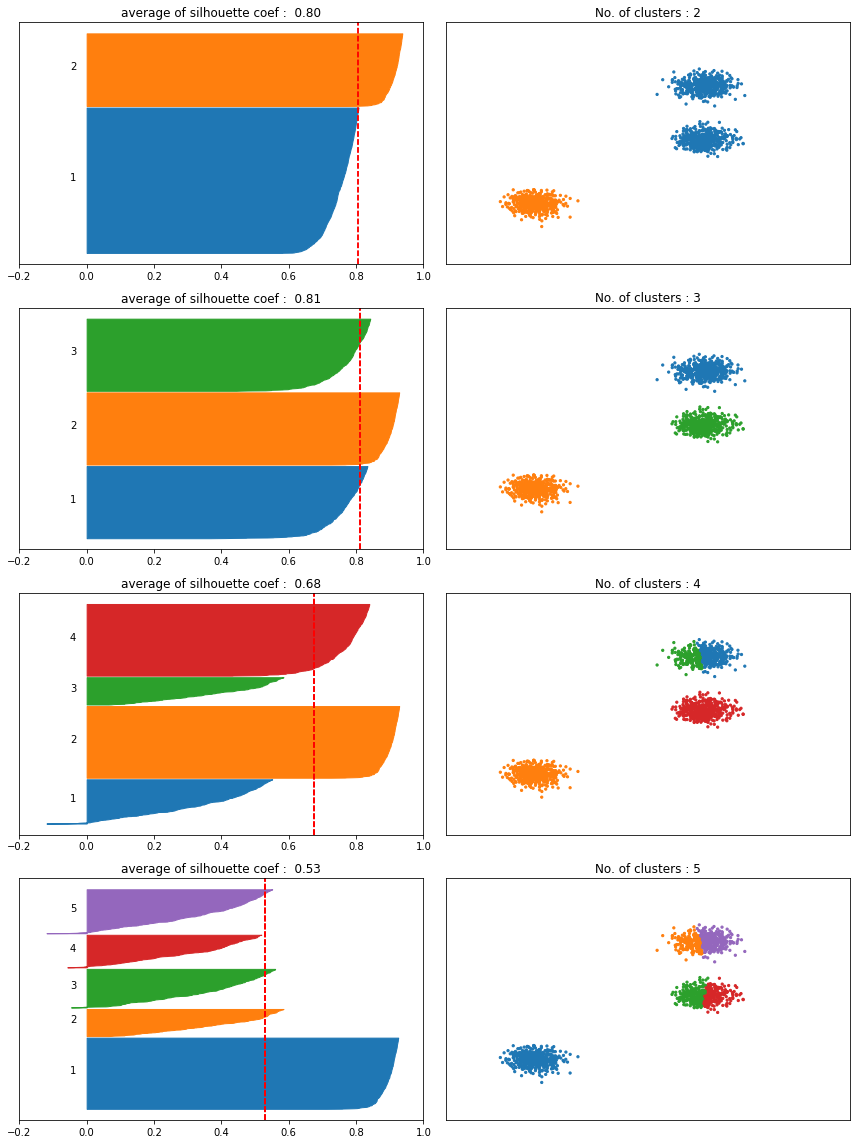

In [44]:
from sklearn.metrics.cluster import silhouette_samples
from sklearn.utils.testing import ignore_warnings

def plot_silhouette(data) :
    
    X = StandardScaler().fit_transform(data[0])
    colors = plt.cm.tab10(np.arange(20, dtype=int))
    plt.figure(figsize=(12, 16))
    for i in range(4) :
        model = SpectralClustering(n_clusters = i + 2, affinity="nearest_neighbors")
        cluster_labels = model.fit_predict(X)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        silhouette_avg = sample_silhouette_values.mean()
        
        plt.subplot(4, 2, 2 * i + 1)
        y_lower = 10
        
        for j in range(i + 2) :
            jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
            jth_cluster_silhouette_values.sort()
            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                             0, jth_cluster_silhouette_values,
                             facecolor=colors[j], edgecolor=colors[j])
            plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j + 1))
            plt.axvline(x = silhouette_avg, color="red", linestyle="--")
            plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.yticks([])
            plt.title("average of silhouette coef : {:5.2f}".format(silhouette_avg))
            y_lower = y_upper + 10
        
        plt.subplot(4, 2, 2 * i + 2)
        plt.scatter(X[:, 0], X[:, 1], s = 5, color=colors[cluster_labels])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title("No. of clusters : {}".format(i + 2))
    
    plt.tight_layout()
    plt.show()
    
plot_silhouette(blobs)
